# Job Posting Data Analysis
In this notebook, the group will be working with the [Job Posting in Singapore](https://www.kaggle.com/datasets/techsalerator/job-posting-data-in-singapore) dataset. This dataset will be used for processing, analyzing, and visualizing data.

This project is carried out by the group **DS NERDS**, under Section **S19**, which consists of the following members:
- Colobong, Franz Andrick
- Chu, Andre Benedict M. 
- Pineda, Mark Gabriel A.
- Rocha, Angelo H. 
  
The output fulfills a part of the requirements for the course Statistical Modeling and Simulation (CSMODEL). 


# Import Libraries

**TO-DO**:
Put a brief description for each module used and how it was used in the notebook.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json

## Dataset Description and Collection Process

This dataset offers a comprehensive overview of job openings across various sectors in Singapore. It provides an essential resource for businesses, job seekers, and labor market analysts, and it can also be a valuable tool for people who would like to be informed about job openings and employment trends in Singapore.

The data was collected by a global data provider called **Techsalerator**, by consolidating and categorizing job-related information from diverse sources, including company websites, job boards, and recruitment agencies. 

Now, let us load the CSV file into our workspace with **'latin1'** encoding as it contains special characters (e.g., é, ñ, ’) that caused a UnicodeDecodeError with the default **'utf-8'** encoding.

In [2]:
job_posting_df = pd.read_csv('Job Posting.csv', encoding='latin1')
job_posting_df.head(5)

,Website Domain,Ticker,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,...,Description,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
0,bosch.com,NaN,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29T19:59:45Z,2024-07-31T14:35:44Z,"Indiana, United States","[{""city"":null,""state"":""Indiana"",""zip_code"":nul...","engineering, management, support",manager,...,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T14:47:55Z,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...
1,bosch.com,NaN,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04T01:00:12Z,2024-07-29T17:46:16Z,"Delaware, United States","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,...,**Professional Internship: Hardware Developmen...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31T17:50:07Z,17-2061.00,Architecture and Engineering,Computer Hardware Engineers
2,zf.com,NaN,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19T06:47:24Z,2024-05-16T02:25:08Z,China,"[{""city"":null,""state"":null,""zip_code"":null,""co...",engineering,non_manager,...,ZF is a global technology company supplying sy...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",NaN,closed,en,2024-05-18T02:32:04Z,51-9141.00,Production,Semiconductor Processing Technicians
3,bosch.com,NaN,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16T10:20:37Z,2024-08-22T11:14:49Z,Romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,...,**DevOps Developer with Python for ADAS Comput...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23T00:33:30Z,15-1252.00,Computer and Mathematical,Software Developers
4,bosch.com,NaN,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01T17:31:20Z,2024-08-01T05:11:33Z,India,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,...,**Senior Engineer Sales - Video Systems and So...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T19:03:16Z,41-9031.00,Sales and Related,Sales Engineers


## Structure of the Data

**`TO-DO`** : Provide the following:
- What each row and column represents (if tabular data)
- Number of observations
- What attributes or features are present in each observation

** use the .info() function to visualize the answer to the questions

In [3]:
job_posting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Website Domain         9919 non-null   object 
 1   Ticker                 0 non-null      float64
 2   Job Opening Title      9919 non-null   object 
 3   Job Opening URL        9919 non-null   object 
 4   First Seen At          9919 non-null   object 
 5   Last Seen At           9919 non-null   object 
 6   Location               9508 non-null   object 
 7   Location Data          9919 non-null   object 
 8   Category               8250 non-null   object 
 9   Seniority              9919 non-null   object 
 10  Keywords               7646 non-null   object 
 11  Description            9807 non-null   object 
 12  Salary                 576 non-null    object 
 13  Salary Data            9919 non-null   object 
 14  Contract Types         8004 non-null   object 
 15  Job 

## Potential Implications of the Data

**`TO-DO`** : Provide the potential implications of how the data was collected on the insights that will be generated

## Key Data Fields 

This section provides a brief description of the key attributes present in the dataset:


- **Job Posting Date**: Captures the date a job is listed. This is crucial for job seekers and HR professionals to stay updated on the latest opportunities and trends.

- **Job Title**: Specifies the position being advertised. This helps in categorizing and filtering job openings based on industry roles and career interests.

- **Company Name**: Lists the hiring company. This information assists job seekers in targeting their applications and helps businesses track competitors and market trends.

- **Job Location**: Provides the job's geographic location within Singapore. Job seekers use this to find opportunities in specific areas, while employers analyze regional talent and market conditions.

- **Job Description**: Includes details about responsibilities, required qualifications, and other relevant aspects. This is vital for candidates to determine if they meet the requirements and for recruiters to communicate expectations clearly.

**`TO-DO`** : Add the description for other important fields

In [4]:
key_data_fields = job_posting_df[['First Seen At', 'Job Opening Title', 'Job Opening URL', 'Location', 'Description']]
key_data_fields.head()

,First Seen At,Job Opening Title,Job Opening URL,Location,Description
0,2024-05-29T19:59:45Z,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,"Indiana, United States",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...
1,2024-05-04T01:00:12Z,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,"Delaware, United States",**Professional Internship: Hardware Developmen...
2,2024-04-19T06:47:24Z,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,China,ZF is a global technology company supplying sy...
3,2024-08-16T10:20:37Z,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,Romania,**DevOps Developer with Python for ADAS Comput...
4,2024-07-01T17:31:20Z,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,India,**Senior Engineer Sales - Video Systems and So...


## Data Pre-Processing

Before diving into analysis, it's essential to **clean and standardize** the dataset to ensure accurate insights. In this section, we focus on preparing the data by addressing duplicates, handling missing values, correcting data types, and other data pre-processing techniques to improve data quality and ensure consistency throughout the analysis.

These steps help improve the **quality, reliability, and interpretability** of our exploratory data analysis (EDA) results.


### Remove Unnecessary Columns
Upon inspection, we can see that the **`Ticker`** column—referring to the stock ticker symbol of the company that posted the job—contains only null values.

Since this column provides no usable information for analysis or modeling, we can safely drop it from the dataset.


In [5]:
# Check the Ticker column
null_count = job_posting_df['Ticker'].isna().sum()
print("Unique Values:", job_posting_df['Ticker'].unique())
print(f"Number of null values: {null_count}")

# Drop the column
job_posting_df = job_posting_df.drop(columns=['Ticker'])

Unique Values: [nan]
Number of null values: 9919


### Remove Duplicate Job Postings

Duplicate job postings can occur when the same job is scraped or recorded multiple times. If left unaddressed, these duplicates can **bias statistical insights**, such as job availability by location or contract type. Removing them ensures each job posting is only counted once.

In [6]:
# Remove Duplicates
job_posting_df = job_posting_df.drop_duplicates()

### Remove Entries with Missing Critical Information

For the purpose of meaningful analysis, we remove records that lack crucial details such as:

- **Location** and **Location Data**: Essential for analyzing geographic trends.
- **Contract Type**: Helps determine the nature of the job, which is important for
categorizing roles.
- **Seniority**: Provides insight into job levels, which is useful for experience-based segmentation.
- **O\*NET Family**: Offers a standardized occupational classification, more reliable and structured than a free-text category.


Missing any of these fields makes the data point less useful and **hinders the development of valid hypotheses** during exploratory data analysis (EDA).


In [7]:
# Display the number of missing values in critical fields
print(job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']].isnull().sum())

# Show how many entries are missing any of the five critical fields
print(
    "Entries missing any of the critical fields:",
    job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']]
    .isnull().any(axis=1).sum(),
    "\n"
)

# Drop rows with any missing value in the critical columns
job_posting_df = job_posting_df.dropna(
    subset=['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family'],
    how='any'
)

# Re-check missing values after dropping
print(job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']].isnull().sum())
print(
    "Entries missing any of the critical fields after cleaning:",
    job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']]
    .isnull().any(axis=1).sum()
)

Location           411
Location Data        0
Contract Types    1915
Seniority            0
O*NET Family         3
dtype: int64
Entries missing any of the critical fields: 2298 

Location          0
Location Data     0
Contract Types    0
Seniority         0
O*NET Family      0
dtype: int64
Entries missing any of the critical fields after cleaning: 0


### Fixing Incorrect Datatypes

To ensure that each column is using the **appropriate data type**, we begin by inspecting the current data types of all fields:


In [8]:
job_posting_df.dtypes

Website Domain           object
Job Opening Title        object
Job Opening URL          object
First Seen At            object
Last Seen At             object
Location                 object
Location Data            object
Category                 object
Seniority                object
Keywords                 object
Description              object
Salary                   object
Salary Data              object
Contract Types           object
Job Status               object
Job Language             object
Job Last Processed At    object
O*NET Code               object
O*NET Family             object
O*NET Occupation Name    object
dtype: object

### Convert Date-based Columns to DateTime Format

The **date fields** in the dataset are initially represented as generic `object` types. In this step, we convert them to their appropriate `datetime` data types and ensure they are consistently formatted.

To achieve this, we use the `pd.to_datetime()` method to parse each column. This allows us to catch any inconsistencies or formatting issues.

Any values that fail to convert (e.g., due to invalid formats or corrupted entries) are automatically set to `NaT` (*Not a Time*), enabling us to easily identify and count invalid or missing entries per column.


In [9]:
# Define the date columns to check
date_fields = ['First Seen At', 'Last Seen At', 'Job Last Processed At']
date_df = job_posting_df[date_fields].copy()

# Convert in-place and count invalid values
for col in date_fields:
    job_posting_df[col] = pd.to_datetime(job_posting_df[col], errors='coerce')
    invalid_count = job_posting_df[col].isna().sum()
    print(f"{invalid_count:,} invalid date value(s) found in '{col}'")

0 invalid date value(s) found in 'First Seen At'
0 invalid date value(s) found in 'Last Seen At'
0 invalid date value(s) found in 'Job Last Processed At'


In [10]:
job_posting_df.dtypes

Website Domain                        object
Job Opening Title                     object
Job Opening URL                       object
First Seen At            datetime64[ns, UTC]
Last Seen At             datetime64[ns, UTC]
Location                              object
Location Data                         object
Category                              object
Seniority                             object
Keywords                              object
Description                           object
Salary                                object
Salary Data                           object
Contract Types                        object
Job Status                            object
Job Language                          object
Job Last Processed At    datetime64[ns, UTC]
O*NET Code                            object
O*NET Family                          object
O*NET Occupation Name                 object
dtype: object

### Standardize Text Fields

To ensure consistency and simplify categorization, we clean key text fields by:

- **Removing leading and trailing spaces**
- **Converting all text to lowercase**

This helps avoid mismatches due to inconsistent casing (e.g., `"Full-Time"` vs `"full-time"`) or trailing whitespace (`"remote "` vs `"remote"`), especially when grouping or filtering values in analysis.

In [11]:
# Clean and standardize text-based columns
job_posting_df['O*NET Family'] = job_posting_df['O*NET Family'].str.strip().str.lower()
job_posting_df['Keywords'] = job_posting_df['Keywords'].str.strip().str.lower()
job_posting_df['Location'] = job_posting_df['Location'].str.strip().str.lower()
job_posting_df['Seniority'] = job_posting_df['Seniority'].str.strip().str.lower()
job_posting_df['Contract Types'] = job_posting_df['Contract Types'].str.strip().str.lower()

Now that all fields have been standardized to **consistent data types and formats**, we can proceed to the next step of the data pre-processing pipeline.


## Categorizing Data for Simplified Analysis

Many fields in the dataset, such as **`Seniority`**, **`Job Category`**, **`Location`**, **`Contract Types`**, and **`Skills`**, contain a wide variety of raw or inconsistent values. While these detailed values may be useful in certain cases, they can make analysis more difficult and less interpretable at a higher level.

To address this, we apply **categorization and grouping techniques** to simplify the data. By consolidating similar or related values into broader, standardized categories, we can make comparisons and aggregations more meaningful

As part of this process, we will import a custom module called `mapper.py`, which contains predefined functions for mapping and standardizing the values in each relevant column.

In [12]:
import mapper as mp

### Categorizing Data by Seniority

To simplify analysis based on job hierarchy, we categorize the `Seniority` field into broader groups. This allows us to analyze trends more effectively across different levels of responsibility.

We begin by inspecting the unique values in the `Seniority` column and then apply a mapping to group them into three categories:
- **Non-Managerial Position**
- **Managerial Position**
- **Executive Position**

To understand the mapping dictionary for seniority, refer to the `mapper.py` file, where it is defined under the variable `seniority_mapping`.


In [13]:
# Check all unique values
unique_values_seniority = job_posting_df['Seniority'].unique()
print(unique_values_seniority)

['manager' 'non_manager' 'director' 'head' 'vice_president' 'c_level'
 'partner' 'president']


In [14]:
# Map the values and count categories
seniority_categories = job_posting_df['Seniority'].map(mp.seniority_mapping)
seniority_category_counts = seniority_categories.value_counts().sort_index()

print("=" * 50)
print(seniority_category_counts)
print("=" * 50)

Seniority
Executive Position           17
Managerial Position        1433
Non-Managerial Position    6171
Name: count, dtype: int64


### Categorizing Data by Job Field

The **job field** was categorized by analyzing the contents of the `O*NET Family` column, which provides more specific insights into the required skills, education, and training for each role. Compared to the `Category` column—which offers a broader and often more general classification—the `O*NET Family` column is a more suitable choice for identifying and analyzing job fields with greater precision.

The mapping logic for grouping related job fields is defined in the `mapper.py` file under the variable `job_fields_mappings`. Refer to that file to view how each O*NET Family is classified into a broader job field.


In [15]:
# Check all unique values
unique_job_fields = job_posting_df['O*NET Family'].unique()
print(unique_job_fields)

['office and administrative support' 'architecture and engineering'
 'computer and mathematical' 'sales and related'
 'installation, maintenance, and repair'
 'business and financial operations' 'production'
 'life, physical, and social science' 'management'
 'community and social service' 'transportation and material moving'
 'healthcare practitioners and technical' 'personal care and service'
 'educational instruction and library' 'construction and extraction'
 'arts, design, entertainment, sports, and media'
 'food preparation and serving related' 'protective service'
 'military specific' 'legal' 'healthcare support'
 'farming, fishing, and forestry'
 'building and grounds cleaning and maintenance']


In [16]:
# Map the values and get the count of the categories
job_fields_categories = job_posting_df['O*NET Family'].map(mp.job_fields_mapping)
job_fields_category_counts = job_fields_categories.value_counts().sort_index()

print("=" * 50)
print(job_fields_category_counts)
print("=" * 50)

O*NET Family
Agriculture and Natural Resources       12
Business and Administration           2861
Education                              247
Engineering and Construction          1202
Facilities Management and Services     285
Government and Public Safety            53
Healthcare                             238
Legal Services                          18
Manufacturing                          669
Multimedia and Sports                   84
Public Service                          33
Science and Research                   269
Technology                            1342
Transportation and Logistics           308
Name: count, dtype: int64


### Categorizing Data by Contract Types

To streamline analysis of employment structures, we categorize the values in the `Contract Types` column. This involves identifying all unique contract types present in the dataset and mapping them to broader, standardized categories.

The mapping logic is defined in the `mapper.py` file under the variable `contract_type_mapping`.


In [17]:
split_contract_types = job_posting_df['Contract Types'].str.split(',').explode()

unique_ctypes = split_contract_types.str.strip().unique()

print(unique_ctypes)

['full time' 'internship' 'm/f' 'intern' 'tempo integral' 'onsite'
 'hybrid' 'remote' '3rd shift' 'long term' 'short term' 'part time'
 'vollzeit' 'm/w' 'permanent' 'temporary' 'contractor' 'fully remote'
 'contract' 'all levels' 'commission' 'summer' 'festanstellung'
 'work from home' 'vaste aanstelling' 'trabalho remoto' 'trainee'
 'practitioner' 'fuldtid' 'pe_ny etat' 'temps plein' 'day shift'
 'night shift' 'full or part time' 'teletrabajo' 'day time' 'm f' 'deltid'
 'nuit' 'temps partiel' 'freelance' 'tempo indeterminato']


In [18]:
from collections import Counter

# Lowercase the contract types for case-sensitive look-ups, substring matching
mapping_ctypes_lower = {k.lower(): v for k, v in mp.contract_types_mapping.items()}

def map_ctypes_in_cell(str_keywords):
    # check for null categories
    if pd.isna(str_keywords):
        return []

    # list of contract types in lowercase
    ctypes_lower = str_keywords.lower()
    mapped_categories = []

    # loop for the contract types inside the category
    for ky, ct in mapping_ctypes_lower.items():
        # if contract types is in the list, append to list the category
        if ky in ctypes_lower:
            mapped_categories.append(ct)

    return mapped_categories

all_ct = []

# access every contract types in the dataset
for ctypes_cells in job_posting_df['Contract Types']:

    # get the category in the contract types cells then add/extend to the list
    ct = map_ctypes_in_cell(ctypes_cells)
    all_ct.extend(ct)

# Example: cell has: ['full time', 'intern', 'long term] --> ['Full Time', 'Internship/Trainee', 'Long Term']  

# counter for all categories
ct_counts = Counter(all_ct) 

# transfer to a dataframe for better mapping
df_counts = pd.DataFrame(list(ct_counts.items()), 
                        columns=['Contract Types', 'Count'])

df_counts = df_counts.sort_values('Count', ascending=False)

# Print the values
df_counts = df_counts.reset_index(drop=True)
print("=" * 50)
print(df_counts.to_string(index=False))
print("=" * 50)


    Contract Types  Count
         Full Time   4810
Internship/Trainee   1666
            Hybrid    874
       Male/Female    686
   Remote/Flexible    445
Contract/Temporary    409
         Long Term    372
        All Levels    284
         Permanent    249
         Part Time    215
           On-site    206
        Commission    108
        Short Term     59
        Shift Work      6
 Full or Part Time      2
          Day Time      2
     Monday-Friday      1
             Night      1


### Categorizing Data by Keywords

The `Keywords` column often contains multiple entries separated by commas. To ensure accurate grouping and analysis, we first clean and split these entries into individual keywords. This helps reduce redundancy caused by inconsistent formatting (e.g., extra spaces, mixed casing).

After cleaning, we identify all unique keyword values and apply standardized categorization where needed. This step supports clearer interpretation of skillsets or role-related descriptors associated with each job posting.

The logic for processing and mapping keyword values is handled in the `mapper.py` file under the relevant keyword-related functions or mappings.

In [19]:
# Split the contents of the keywords column
split_keywords = job_posting_df['Keywords'].str.split(',').explode()

# Then find the unique values, these mitigates redundancy a lot
unique_keywords = split_keywords.str.strip().unique()

print(unique_keywords)

[nan 'scrum' 'github' 'jenkins' 'growth' 'c++' 'linux' 'python'
 'microsoft azure' 'docker' 'business development' 'internship'
 'ecommerce' 'sap successfactors' 'e-commerce' 'servicenow' 'microsoft'
 'sap' 'cognex' 'omron' 'call center' 'hris' 'salesforce' 'social media'
 'customer success' 'contentful' 'gainsight' 'facebook' 'linkedin'
 'agorapulse' 'teamtailor' '.net' 'c#' 'angular' 'android' 'java' 'gerrit'
 'kotlin' 'power bi' 'keyence' 'bmc remedy' 'databricks'
 'azure databricks' 'microsoft excel' 'microsoft teams' 'simulink' 'novi'
 'kanban' 'real estate' 'microsoft word' 'sap s/4hana' 'informatica'
 'atlassian' 'atlassian jira' 'splunk' 'matlab' 'selenium' 'gradle'
 'postman' 'javascript' 'successfactors' 'qualtrics' 'microsoft 365'
 'contractor' 'branding' 'outbound' 'glassdoor' 'websocket' 'sigfox'
 'json' 'django' 'ansible' 'kubernetes' 'marketing campaigns' 'front-end'
 'back-end' 'angularjs' 'node.js' 'php' 'ruby' 'gatsby' 'graphql' 'remix'
 'informa' 'hubspot' 'microsoft

The `Keywords` column contained over **500+ unique values**, many of which represented similar or related concepts. To reduce redundancy and make analysis more manageable, the values were **grouped into broader categories** such as *Programming Languages*, *Frameworks & Libraries*, *Tools & Platforms*, and others.

The mapping process was initially assisted by AI to generate a comprehensive list of groupings. A group member then manually **reviewed and verified** the mappings to ensure accuracy and consistency across the dataset.


In [20]:
from collections import Counter

# Lowercase the keys for case-sensitive look-ups, substring matching
mapping_skills_lower = {k.lower(): v for k, v in mp.keywords_skills_mapping.items()}

def map_keywords_in_cell(str_keywords):
    # check for null categories
    if pd.isna(str_keywords):
        return []

    # list of keywords in lowercase
    keywords_lower = str_keywords.lower()
    mapped_categories = []

    # loop for the key inside the category
    for ky, ct in mapping_skills_lower.items():
        # if keyword is in the list, append to list the category
        if ky in keywords_lower:
            mapped_categories.append(ct)

    return mapped_categories

all_ct = []


# access every keyword in the dataset
for ky_cells in job_posting_df['Keywords']:

    # get the category in the keywords cells then add/extend to the list
    ct = map_keywords_in_cell(ky_cells)
    all_ct.extend(ct)

# Example: cell has: ['c++', 'mysql', 'linux] --> ['Programming Language', 'Databases', 'Operating System']  

# counter for all categories
ct_counts = Counter(all_ct) 

# transfer to a dataframe for better mapping
df_counts = pd.DataFrame(list(ct_counts.items()), 
                        columns=['Category', 'Count'])

df_counts = df_counts.sort_values('Count', ascending=False)

# Print the values
df_counts = df_counts.reset_index(drop=True)
print("=" * 50)
print(df_counts.to_string(index=False))
print("=" * 50)


                      Category  Count
         Programming Languages   5260
       ERP & Business Software   4774
      Other and Broader Skills   1732
                 Methodologies   1460
Marketing & Social Media Tools    916
        Frameworks & Libraries    886
                DevOps & CI/CD    613
                Cloud Services    590
                Analytics & BI    576
             Tools & Platforms    504
           CMS & Web Platforms    368
             Operating Systems    262
                     Databases    255
                           CRM    215
            Project Management    214
                  Design Tools    196
         Networking & Security    127
                      Hardware    117
           Tools and Platforms     76


### Parsing and Analyzing Location Data

To extract meaningful insights from the `Location Data` column, we begin by parsing its contents—originally stored in JSON-like strings—into structured dictionaries. We begin by creating a copy of the main dataset into `locations_df` to avoid modifying the original `job_posting_df`.

In [21]:
locations_df = job_posting_df.copy()
# Check the contents of the Location Data
locations_df['Location Data']

0       [{"city":null,"state":"Indiana","zip_code":nul...
1       [{"city":null,"state":"Delaware","zip_code":nu...
3       [{"city":null,"state":null,"zip_code":null,"co...
4       [{"city":null,"state":null,"zip_code":null,"co...
5       [{"city":"Yokohama","state":null,"zip_code":nu...
                              ...                        
9914    [{"city":"Charleston","state":"South Carolina"...
9915    [{"city":null,"state":"Indiana","zip_code":nul...
9916    [{"city":null,"state":null,"zip_code":null,"co...
9917    [{"city":"Aveiro","state":null,"zip_code":null...
9918    [{"city":"Jiaxing","state":null,"zip_code":nul...
Name: Location Data, Length: 7621, dtype: object

This section focuses on extracting structured information from the `Location Data` column, which contains location details in JSON format. Each entry is parsed into a Python dictionary using a custom `parse_location()` function. This function handles both single dictionary entries and lists of dictionaries, returning a standardized format for further processing.

After parsing, the `json_normalize()` method is used to flatten the nested data structure, transforming the location attributes (such as `city`, `region`, and `country`) into separate columns. This results in a cleaner and more analyzable format, allowing us to explore geographic distributions—such as the number of job postings per country.


In [22]:
# Parse data into a dictionary
def parse_location(str_location):
    try:
        # Convert the json file into a python object
        data = json.loads(str_location)

        # Takes the first element: if a list, else returns the dictionary as the 
        # first element, otherwise return the dictionary
        return data[0] if isinstance(data, list) else data
    except:
        # Return an empty list
        return {}

# Parse the location data  
locations_df['Location Data'] = locations_df['Location Data'].apply(
    parse_location
)

locations_df = locations_df['Location Data'].apply(pd.Series)
locations_df

,city,state,zip_code,country,region,continent,fuzzy_match
0,None,Indiana,None,United States,None,None,False
1,None,Delaware,None,United States,None,None,False
3,None,None,None,Romania,None,None,False
4,None,None,None,India,None,None,False
5,Yokohama,None,None,Japan,None,None,False
...,...,...,...,...,...,...,...
9914,Charleston,South Carolina,None,United States,None,None,False
9915,None,Indiana,None,United States,None,None,False
9916,None,None,None,Serbia,None,None,False
9917,Aveiro,None,None,Portugal,None,None,False


In [23]:
# Display the contents by categorizing the total number of entries per country
locations_df['country'].value_counts()

country
United States           2386
India                   1028
Germany                  964
Brazil                   299
Mexico                   295
Portugal                 294
Hungary                  261
Poland                   256
Turkey                   157
Japan                    156
Romania                  147
China                    119
Spain                    108
Malaysia                 103
United Kingdom            96
Czechia                   87
Austria                   85
Serbia                    70
Belgium                   61
Denmark                   56
Slovenia                  52
France                    49
Vietnam                   49
Netherlands               44
Thailand                  41
Colombia                  38
Australia                 32
Ireland                   27
Slovakia                  25
Italy                     24
Morocco                   20
Switzerland               16
Egypt                     14
Canada                    11
Argent

### Salary Data Extraction and Preparation

To better understand the **`Salary Data`** column, we begin by creating a separate copy of the original DataFrame called `salary_df`. This ensures that all salary-related transformations and cleaning steps can be performed safely without altering the original `job_posting_df`. 

In [24]:
salary_df = job_posting_df.copy()
salary_df['Salary Data']


0       {"salary_low":null,"salary_high":null,"salary_...
1       {"salary_low":null,"salary_high":null,"salary_...
3       {"salary_low":null,"salary_high":null,"salary_...
4       {"salary_low":null,"salary_high":null,"salary_...
5       {"salary_low":null,"salary_high":null,"salary_...
                              ...                        
9914    {"salary_low":null,"salary_high":null,"salary_...
9915    {"salary_low":null,"salary_high":null,"salary_...
9916    {"salary_low":null,"salary_high":null,"salary_...
9917    {"salary_low":null,"salary_high":null,"salary_...
9918    {"salary_low":null,"salary_high":null,"salary_...
Name: Salary Data, Length: 7621, dtype: object

Upon inspection, we notice that the salary descriptions are stored as **JSON objects**—but currently in the form of **JSON strings**.

To make this data usable, we will:

1. **Parse** each string into a Python dictionary.
2. **Normalize** the dictionary so that each key becomes its own separate column in the DataFrame.

This will give us a clearer structure, allowing us to inspect and clean salary values more effectively.


In [25]:
salary_df = job_posting_df.copy()

# Parse json object into a dictionary
salary_df['Salary Data'] = salary_df['Salary Data'].apply(
    lambda x: json.loads(x) if isinstance(x, str) else x
)

# Normalize Salary Data into new columns and remove rows with null values
salary_df = pd.json_normalize(salary_df['Salary Data'])
salary_df

,salary_low,salary_high,salary_currency,salary_low_usd,salary_high_usd,salary_time_unit
0,NaN,NaN,None,NaN,NaN,None
1,NaN,NaN,None,NaN,NaN,None
2,NaN,NaN,None,NaN,NaN,None
3,NaN,NaN,None,NaN,NaN,None
4,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...
7616,NaN,NaN,None,NaN,NaN,None
7617,NaN,NaN,None,NaN,NaN,None
7618,NaN,NaN,None,NaN,NaN,None
7619,NaN,NaN,None,NaN,NaN,None


By running `salary_df.info()`, we can observe that out of thousands of job postings, only **434** entries contain salary-related information. 

Since salary is a critical detail when analyzing job data, we want to ensure our next steps focus only on entries where salary is provided. To simplify our cleaning process, we will **temporarily drop rows with null values** for salary-related fields.


In [26]:
salary_df.info() 

# Drop rows with any null values
salary_df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7621 entries, 0 to 7620
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary_low        408 non-null    float64
 1   salary_high       408 non-null    float64
 2   salary_currency   408 non-null    object 
 3   salary_low_usd    408 non-null    float64
 4   salary_high_usd   408 non-null    float64
 5   salary_time_unit  408 non-null    object 
dtypes: float64(4), object(2)
memory usage: 357.4+ KB


Now that we've removed rows with null values, we can inspect the unique values present in each field. 

In particular, the **`salary_currency`** column contains two distinct values: **USD** and **EUR**.


In [27]:
salary_df['salary_currency'].value_counts()

salary_currency
USD    289
EUR    119
Name: count, dtype: int64

After checking the `salary_currency` field, we observe that most job salaries are already in **USD**. 

To ensure consistency in our analysis, we will normalize the data by converting all **EUR** salaries to **USD** using the exchange rate as of **June 17, 2025**:

- **1 EUR = 1.15 USD**

This conversion allows us to compare salaries more accurately and ensures uniformity across the dataset.


In [28]:
# Define conversion rate from EUR to USD
conversion_rate = 1.15

# Convert EUR to USD
for index, row in salary_df.iterrows():
    if row['salary_currency'] == 'EUR':
        salary_df.loc[index, 'salary_low'] = row['salary_low'] * conversion_rate
        salary_df.loc[index, 'salary_high'] = row['salary_high'] * conversion_rate
        salary_df.loc[index, 'salary_currency'] = 'USD'

# Drop redundant salary column 
salary_df.drop(columns=['salary_low_usd', 'salary_high_usd'], inplace=True, errors='ignore')

salary_df

,salary_low,salary_high,salary_currency,salary_time_unit
24,49.45,49.45,USD,hour
26,34437.90,34437.90,USD,year
124,171000.00,190000.00,USD,year
133,19.50,19.50,USD,hour
162,234062.00,245000.00,USD,year
...,...,...,...,...
7392,70000.00,86300.00,USD,year
7393,1087.90,1087.90,USD,month
7416,43.00,66.00,USD,hour
7501,16.50,16.50,USD,hour


Now that all the salaries are represented in **USD**, we can focus on the `salary_time_unit` column, which is categorized into three values: **hour**, **month**, and **year**. These indicate how each salary is paid.

In [29]:
salary_df['salary_time_unit'].value_counts()

salary_time_unit
year     234
hour     126
month     48
Name: count, dtype: int64

We notice that most salaries are already given on an **annual basis**. To maintain consistency and enable easier comparisons, we will convert all salaries to **annual salary**.

#### Conversion Formulas:
- **Monthly to Annual**:
  - `annual_salary = monthly_salary * 12`

- **Hourly to Annual** (assuming a standard 9-to-5 schedule):
  - `hours_per_week = 40`
  - `weeks_per_year = 52`
  - `hourly_to_annual = 40 * 52 = 2080`

In [30]:
# Conversion factors
monthly_to_annual = 12
hours_per_week = 40
weeks_per_year = 52
hourly_to_annual = hours_per_week * weeks_per_year  # 40 * 52 = 2080

for index, row in salary_df.iterrows():
    # Convert hourly salaries to annual
    if (row['salary_time_unit'] == 'hour'):
        salary_df.loc[index, 'salary_low'] = row['salary_low'] * hourly_to_annual
        salary_df.loc[index, 'salary_high'] = row['salary_high'] * hourly_to_annual
        salary_df.loc[index, 'salary_time_unit'] = 'year'
    
    # Convert monthly salaries to annual
    elif (row['salary_time_unit'] == 'month'):
        salary_df.loc[index, 'salary_low'] = row['salary_low'] * monthly_to_annual
        salary_df.loc[index, 'salary_high'] = row['salary_high'] * monthly_to_annual
        salary_df.loc[index, 'salary_time_unit'] = 'year'

    # Retain annual salaries
    else:
        salary_df.loc[index, 'salary_low'] = row['salary_low']
        salary_df.loc[index, 'salary_high'] = row['salary_high']

salary_df


,salary_low,salary_high,salary_currency,salary_time_unit
24,102856.0,102856.0,USD,year
26,34437.9,34437.9,USD,year
124,171000.0,190000.0,USD,year
133,40560.0,40560.0,USD,year
162,234062.0,245000.0,USD,year
...,...,...,...,...
7392,70000.0,86300.0,USD,year
7393,13054.8,13054.8,USD,year
7416,89440.0,137280.0,USD,year
7501,34320.0,34320.0,USD,year


Now that all salaries are in the same currency (**USD**) and time unit (**annual**), we can focus on the `salary_low` and `salary_high` fields.

These two fields represent the **lower and upper bounds** of the offered salary range. To simplify the analysis and create a single representative salary value, we will take the **mean** of these two values.

This gives us a new column, `annual_salary`, which reflects the average offered salary for the job.

In [31]:
salary_df['annual_salary'] = (salary_df[['salary_low', 'salary_high']].mean(axis=1))
salary_df

,salary_low,salary_high,salary_currency,salary_time_unit,annual_salary
24,102856.0,102856.0,USD,year,102856.0
26,34437.9,34437.9,USD,year,34437.9
124,171000.0,190000.0,USD,year,180500.0
133,40560.0,40560.0,USD,year,40560.0
162,234062.0,245000.0,USD,year,239531.0
...,...,...,...,...,...
7392,70000.0,86300.0,USD,year,78150.0
7393,13054.8,13054.8,USD,year,13054.8
7416,89440.0,137280.0,USD,year,113360.0
7501,34320.0,34320.0,USD,year,34320.0


Now that we've created the `annual_salary` column, the original fields—`salary_low`, `salary_high`, `salary_currency`, and `salary_time_unit`—are no longer needed for further analysis.

To clean up the DataFrame and simplify its structure, we will drop these columns.


In [32]:
salary_df.drop(columns=['salary_low', 'salary_high', 'salary_currency', 'salary_time_unit'], inplace=True)
salary_df

,annual_salary
24,102856.0
26,34437.9
124,180500.0
133,40560.0
162,239531.0
...,...
7392,78150.0
7393,13054.8
7416,113360.0
7501,34320.0


Now that we've cleaned and normalized the salary information into a single `annual_salary` column, we can integrate it back into the original `job_posting_df`.

We will assign this as a new column called `Annual_Salary`, allowing us to analyze job postings alongside their corresponding annual salaries.

In [33]:
# Add the annual salary to the original job_posting_df
job_posting_df['Annual_Salary'] = salary_df['annual_salary']
job_posting_df[job_posting_df['Annual_Salary'].notnull()]

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,...,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name,Annual_Salary
24,bosch.com,CONFERENTE (27059),https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-02 17:38:17+00:00,2024-07-09 06:38:08+00:00,brazil,"[{""city"":null,""state"":null,""zip_code"":null,""co...",NaN,non_manager,NaN,...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,pt,2024-07-11 08:34:20+00:00,13-1121.00,business and financial operations,"Meeting, Convention, and Event Planners",102856.0
26,bosch.com,Controls Engineer,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-03-07 23:23:28+00:00,2024-03-31 21:31:45+00:00,"lincolnton, north carolina, 28092, united states","[{""city"":""Lincolnton"",""state"":""North Carolina""...",engineering,non_manager,NaN,...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-04-02 22:34:31+00:00,17-2071.00,architecture and engineering,Electrical Engineers,34437.9
124,zf.com,Manager Pricing Tools & Technology (m/f/d),https://jobs.zf.com/job/Bruxelles-Manager-Pric...,2024-08-15 09:05:05+00:00,2024-09-02 11:38:18+00:00,belgium,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, management",manager,sap,...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",m/f,NaN,en,2024-09-02 11:38:18+00:00,41-3031.00,sales and related,"Securities, Commodities, and Financial Service...",180500.0
184,zf.com,Cloud Platform Engineer-Internship,https://jobs.zf.com/job/Monterrey-Cloud-Platfo...,2024-07-03 04:09:38+00:00,2024-07-23 07:23:27+00:00,"monterrey, mexico","[{""city"":""Monterrey"",""state"":null,""zip_code"":n...","engineering, information_technology, internship",non_manager,"microsoft, growth, c++, java, python, internsh...",...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","internship, intern",closed,en,2024-07-25 07:29:19+00:00,15-1299.08,computer and mathematical,Computer Systems Engineers/Architects,54080.0
187,heraeus.com,Territory Specialist - Atlanta Georgia,https://jobs.heraeus.com/job/remote-NA-Territo...,2024-06-13 12:33:42+00:00,2024-09-03 20:18:09+00:00,united states,"[{""city"":null,""state"":null,""zip_code"":null,""co...",NaN,non_manager,sap successfactors,...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",remote,NaN,en,2024-09-03 20:18:09+00:00,43-4181.00,office and administrative support,Reservation and Transportation Ticket Agents a...,45760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,bosch.com,Senior Industrial Engineer,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-03-13 01:33:48+00:00,2024-05-07 11:26:15+00:00,"roseville, california, 95747, united states","[{""city"":""Roseville"",""state"":""California"",""zip...",engineering,non_manager,"microsoft, oracle",...,base salary range for this full-time position ...,"{""salary_low"":88000.0,""salary_high"":100000.0,""...",full time,closed,en,2024-05-09 11:32:27+00:00,17-2112.00,architecture and engineering,Industrial Engineers,113360.0
7389,bosch.com,Sales and Marketing Intern,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-21 17:59:32+00:00,2024-07-23 13:58:35+00:00,"lincolnton, north carolina, 28092, united states","[{""city"":""Lincolnton"",""state"":""North Carolina""...","internship, marketing, sales",non_manager,"growth, marketing campaigns, social media, int...",...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, long term, intern",closed,en,2024-07-25 14:07:28+00:00,13-1161.00,business and financial operations,Market Research Analysts and Marketing Special...,45760.0
7390,bosch.com,Talent Acquisiton - Internship (f/m/div.),https://jobs.smartrecruiters.com/BoschGroup/74...,2024-03-18 15:30:12+00:00,2024-03-24 15:58:04+00:00,portugal,"[{""city"":n

**`TO-DO`** : Check for outliers in the annual salary column

## Outlier Detection

We start outlier detection by selecting the `Annual_Salary` column and removing any missing values. This ensures we work only with complete salary records, which is necessary for accurate analysis.

In [34]:
annual_salary = job_posting_df['Annual_Salary'].dropna()

Since the salary data is roughly normalized, we use the Z-score method to detect outliers. The Z-score measures how many standard deviations each value is from the mean, making it effective for identifying unusually high or low salaries in normalized data. This method is preferred over others like the interquartile range (IQR), which work better when the data is skewed or not normalized. We calculate the Z-scores for each salary to see how far it is from the average. Salaries with a Z-score greater than 3 or less than -3 are identified as outliers because they lie far outside the typical range. We then separate these outliers from the rest, keeping only the salaries with Z-scores within ±3 as normal data.

In [35]:
z_scores = stats.zscore(annual_salary)
outliers = annual_salary[(abs(z_scores) > 3)]
no_outliers = annual_salary[(abs(z_scores) <= 3)]

We print the outliers to see which salaries are flagged as extreme, and also print the count of salaries without outliers. This helps us understand how many data points remain after removing unusual values.

In [36]:
print("Outliers detected:")
print(outliers)

print("\nNumber of salaries without outliers:", len(no_outliers))

Outliers detected:
5172    320500.0
7323    277500.0
Name: Annual_Salary, dtype: float64

Number of salaries without outliers: 305


Finally, we visualize the effect of outliers on the salary distribution by plotting a boxplot with two groups: the full salary data and the data without outliers. This comparison shows how outliers stretch the salary range and affect the overall distribution.

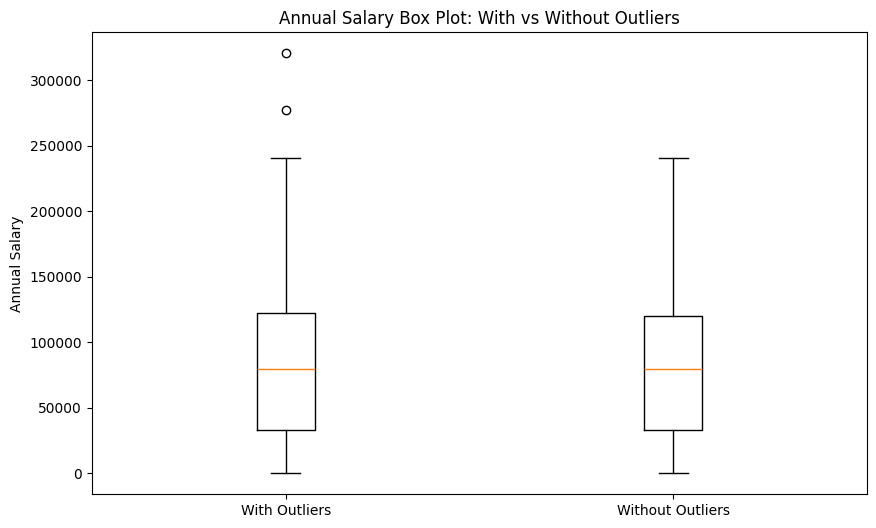

In [37]:
plt.figure(figsize = (10,6))
plt.boxplot([annual_salary, no_outliers], tick_labels=['With Outliers', 'Without Outliers'])
plt.ylabel('Annual Salary')
plt.title('Annual Salary Box Plot: With vs Without Outliers')
plt.show()

We update the `job_posting_df` by keeping `Annual_Salary` that are not outliers and replacing outlier salaries with `NaN`. This marks extreme values as missing while preserving the rest of the data for analysis.

In [38]:
job_posting_df.loc[no_outliers.index, 'Annual_Salary'] = no_outliers
job_posting_df.loc[outliers.index, 'Annual_Salary'] = np.nan

## General Research Question

Understanding the global job landscape is essential for identifying emerging opportunities, evolving skill demands, and industry-wide shifts across different regions. By analyzing job postings and employment data, we can uncover meaningful insights into how the workforce is transforming over time.

With this in mind, the group formulated the research question:

> **What are the underlying patterns and trends in the international job market?**


**`TO-DO`** : Answer the eda questions. If applicable, use data visualization tehcniques to better display the data.

### EDA Question 1 - Annual Salary and Job Field 
Job field in this case lies on their category within the `O*NET Family` categorization in the dataset. In this EDA question, the researchers aim to understand the following:
- What is the relationship between the annual salary and the job field in the dataset?
- What is the average salary for each job field?
- Which job fields show the lowest and highest salary variability?



### EDA Question 2 - Seniority and Contract Types (and Salary Relevance)
The researchers aim for this EDA question are to identify related patterns and trends within the `Seniority` and `Contract Types` variables. They will be guided by the following questions:
- What is the relationship between seniority and contract types in the dataset?
- What is the salary distribution for each combination/category of seniority and their equal contract types?
- Are certain contract types more prevalent at specific seniority levels?


### EDA Question 3 - Locations and Skills
Skills in this case lies on their category within the `Keywords` categorization in the dataset. In this EDA question, the researchers aim to understand the following:
- What is the relationship between the skills required by companies that are outsourcing to specific locations?
- What are the prevalent skill categories that exist for each location?
- Which locations have the highest demand for specific skills?

To answer this question, we combine location data from `locations_df` and skills extracted from the `Keywords column`. The code maps and filters unique skills, stores them in a new `Skills` column, and merges this with the country data. Using `explode()`, each skill is listed per row to easily analyze the relationship between skills and their outsourcing locations.

In [39]:
skills_ct = []

for ky_cells in job_posting_df['Keywords']:
    ct = map_keywords_in_cell(ky_cells)
    ct_unique = list(dict.fromkeys(ct))
    skills_ct.append(ct_unique)

job_posting_df['Skills'] = skills_ct
country_skills = pd.concat([locations_df['country'], job_posting_df['Skills']], axis=1)
country_skills = country_skills.explode('Skills')

This code counts how often each skill appears per `country`, then selects the top skill with the highest count for each location. It helps identify the most prevalent skill category in every country.

In [41]:
skill_counts = country_skills.groupby(['country', 'Skills']).size().reset_index(name='count')
top_skills_by_country = skill_counts.sort_values(['country', 'count'], ascending=[True, False]).groupby('country').head(1)
top_skills_by_country

,country,Skills,count
6,Argentina,Programming Languages,6
19,Australia,Programming Languages,22
25,Austria,ERP & Business Software,39
36,Belgium,ERP & Business Software,29
49,Brazil,ERP & Business Software,127
61,Bulgaria,ERP & Business Software,2
70,Canada,Programming Languages,5
72,Chad,Cloud Services,2
77,Chile,Programming Languages,1
82,China,ERP & Business Software,45


This code finds the country with the highest demand for each skill by grouping the data by `Skills` and selecting the top location based on count. The result is then sorted to show the most in-demand skill across all countries.

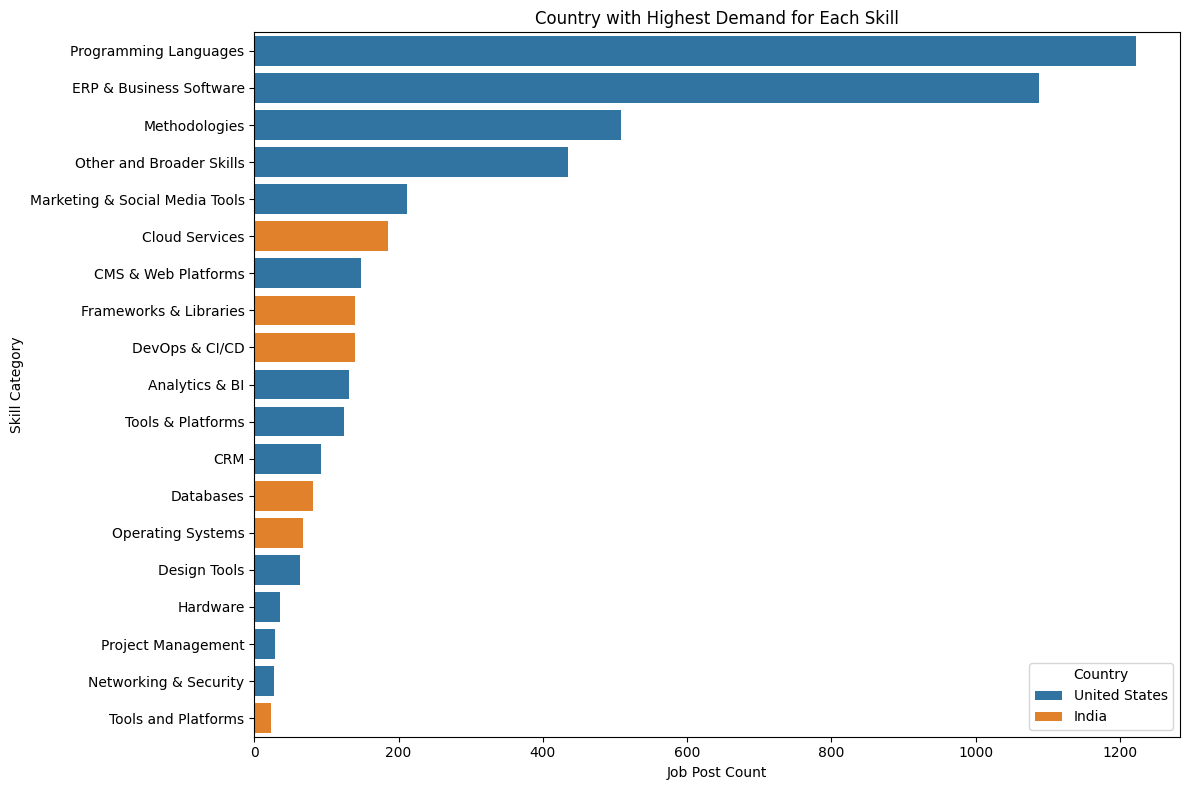

In [43]:
top_skills = skill_counts.sort_values(['Skills', 'count'], ascending=[True, False]).groupby('Skills').head(1).sort_values('count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_skills, x='count', y='Skills', hue='country')
plt.title('Country with Highest Demand for Each Skill')
plt.xlabel('Job Post Count')
plt.ylabel('Skill Category')
plt.legend(title='Country')
plt.tight_layout()
plt.show()